# Gaussian MC integral

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from tqdm.notebook import tqdm

plt.style.use('seaborn-v0_8-deep')
%matplotlib inline
%config InlineBackend.figure_format='retina'

### MC integral

Define the function to integrate, give the MC integral

In [2]:
def f(x, sigma):
    return 0.5 * (sigma * np.sqrt(2*np.pi)) * x**3

I divided by 2 because I will take the absolute value of x, integrating only over the positive values of x. Alternatively, I could have discarded all the negative x, in which case the 0.5 factor would not have been necessary. The other multiplication factor is added in order to normalize the Gaussian.

MC integral: draw random gaussian points, take the abs value and evaluate the integrand function on those, then compute the mean.

In [3]:
def integration (mu, sigma, N):
    x = np.abs(scipy.stats.norm(loc=mu,scale=sigma).rvs(N))
    return (1/N)*np.sum(f(x, sigma)) 

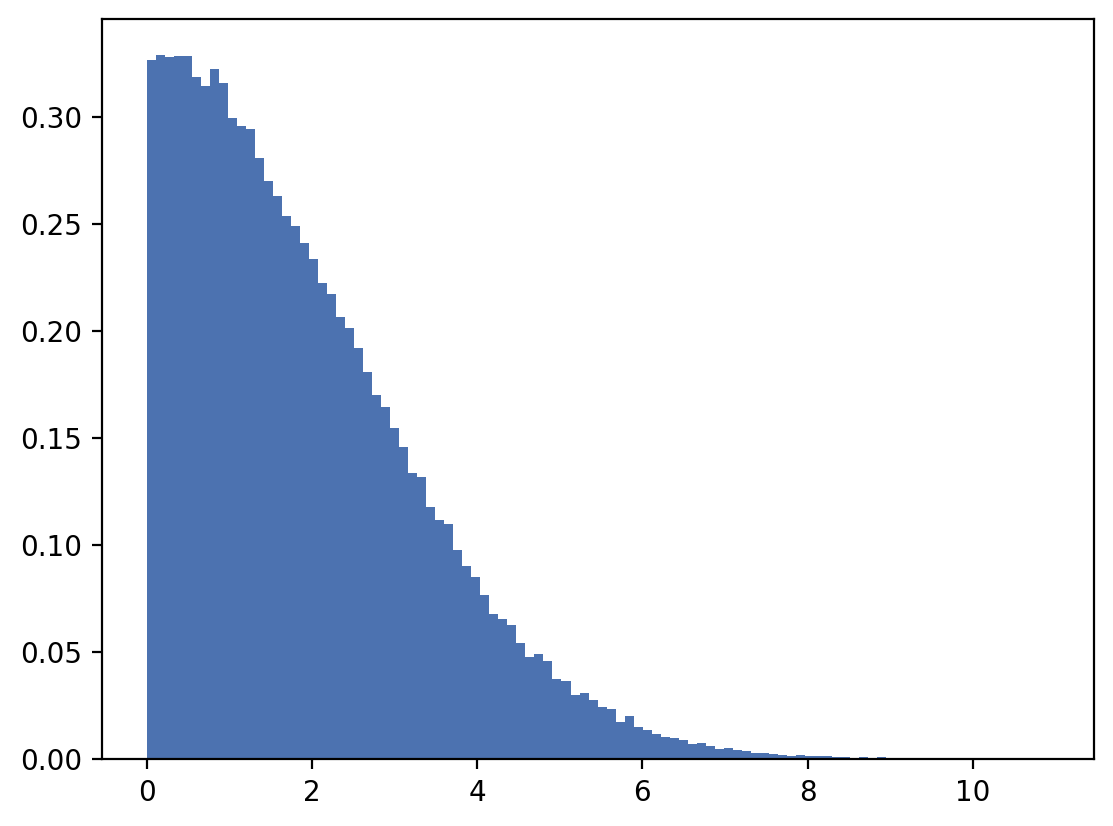

In [4]:
mu, sigma = 0., 2.4 # mean and standard deviation
N = 100000

x_i_abs = np.abs(scipy.stats.norm(loc=mu,scale=sigma).rvs(N))

plt.hist(x_i_abs, bins=100, density=True)
plt.show()

In [5]:
integral_value = integration(mu, sigma, N)
expected_value = 2*sigma**4

print('Integral: ' + str(integral_value))
print('Expected value: ' + str(expected_value))

error = np.abs((integral_value - expected_value)/expected_value)
print('Error: ' + str(error))

Integral: 66.21818737384314
Expected value: 66.3552
Error: 0.0020648363075819235


### Check if the computed integral converges to the expected value

In [6]:
N_eval = np.unique(np.logspace(0, 6, 100, dtype=int))

computed_integral = np.array([integration(mu, sigma, N) for N in tqdm(N_eval)]) 

error = np.abs((computed_integral - expected_value)/expected_value)

  0%|          | 0/92 [00:00<?, ?it/s]

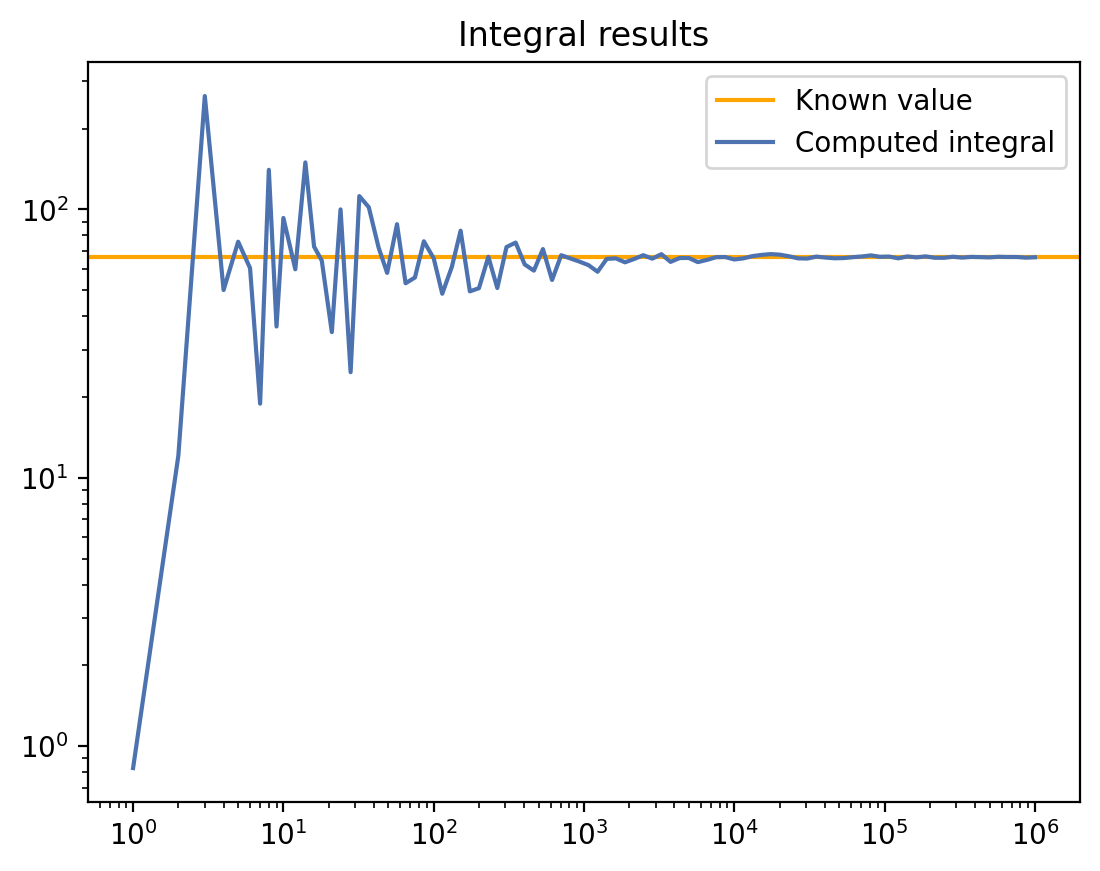

In [7]:
plt.axhline(expected_value, color='orange', label='Known value')
plt.plot(N_eval, computed_integral, label='Computed integral')
plt.loglog()
plt.title('Integral results')
plt.legend()
plt.show()

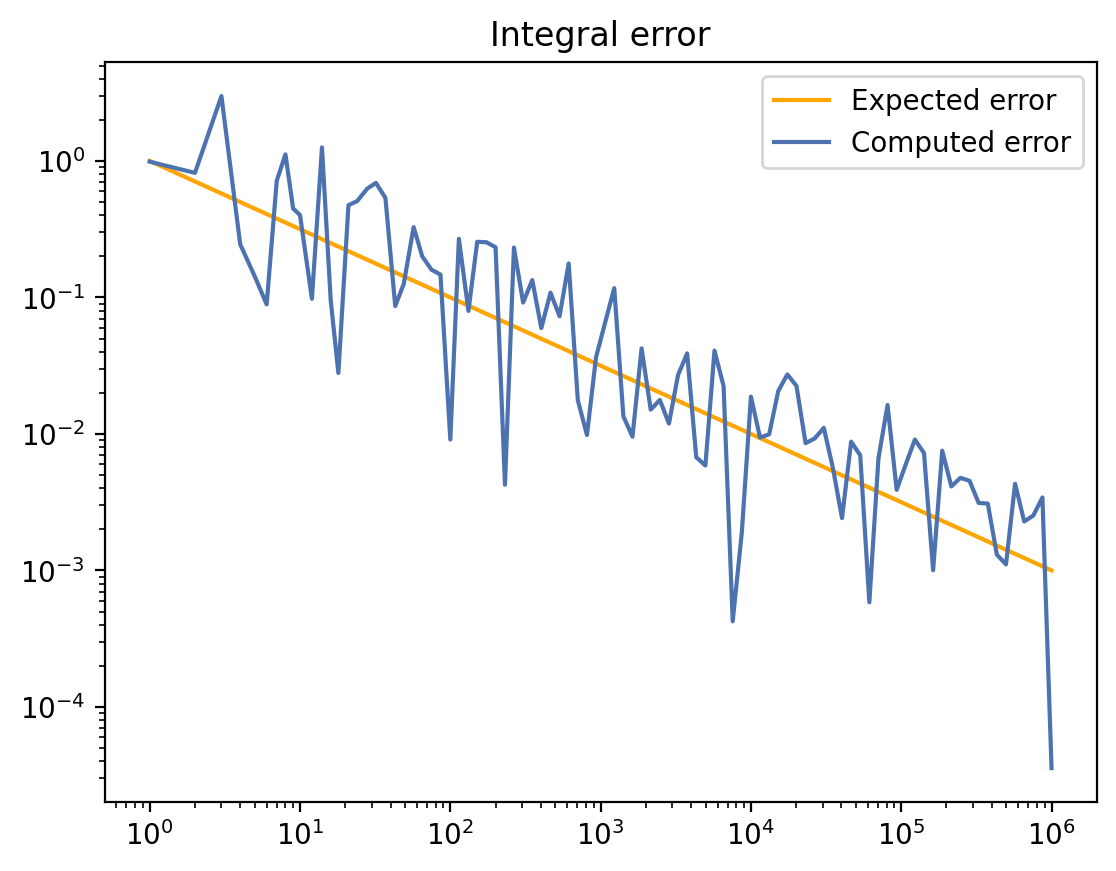

In [8]:
plt.plot(N_eval, N_eval**(-1/2), color='orange', label='Expected error')
plt.plot(N_eval, error, label='Computed error')
plt.loglog()
plt.title('Integral error')
plt.legend()
plt.show()

### For a given N, how are the result distributed?

#### Smaller N

  0%|          | 0/10000 [00:00<?, ?it/s]

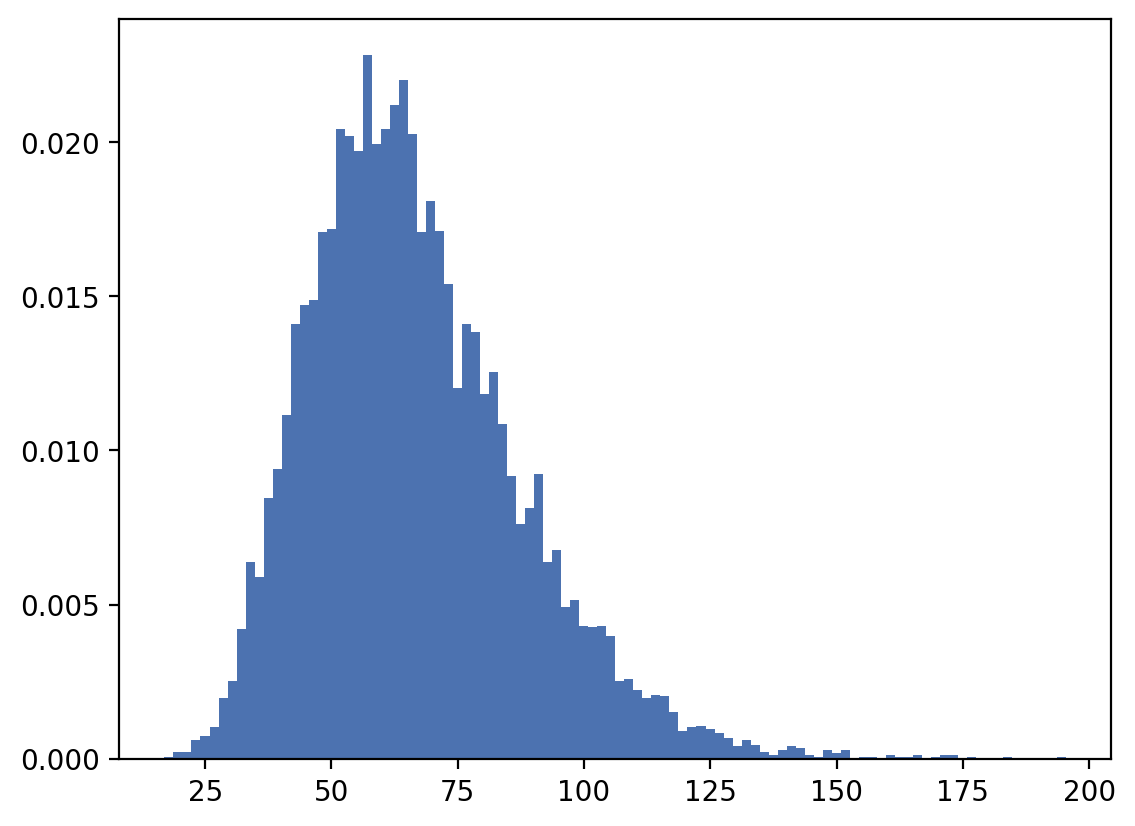

In [9]:
N = 50
nToy = 10000

integral_value = np.array([integration(mu, sigma, N) for n in tqdm(range(nToy))])

plt.hist(integral_value, bins=100, density=True)
plt.show()

I try to plot it with a Gaussian, using the mean and the std deviation

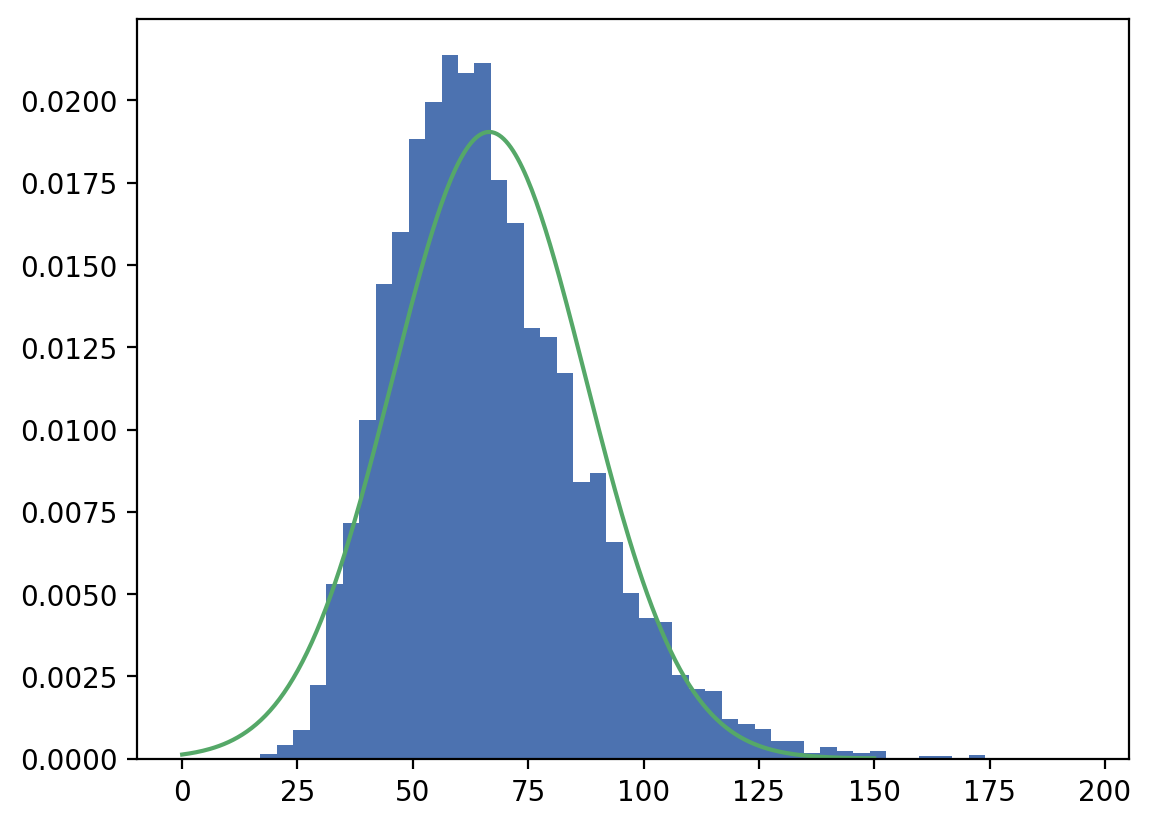

In [10]:
x_grid = np.linspace(0,150,300)
plt.hist(integral_value, bins=50, density=True)

mu_int = np.mean(integral_value)
sigma_int = np.std(integral_value)
plt.plot(x_grid, scipy.stats.norm(mu_int,sigma_int).pdf(x_grid))
plt.show()

#### Bigger N

  0%|          | 0/10000 [00:00<?, ?it/s]

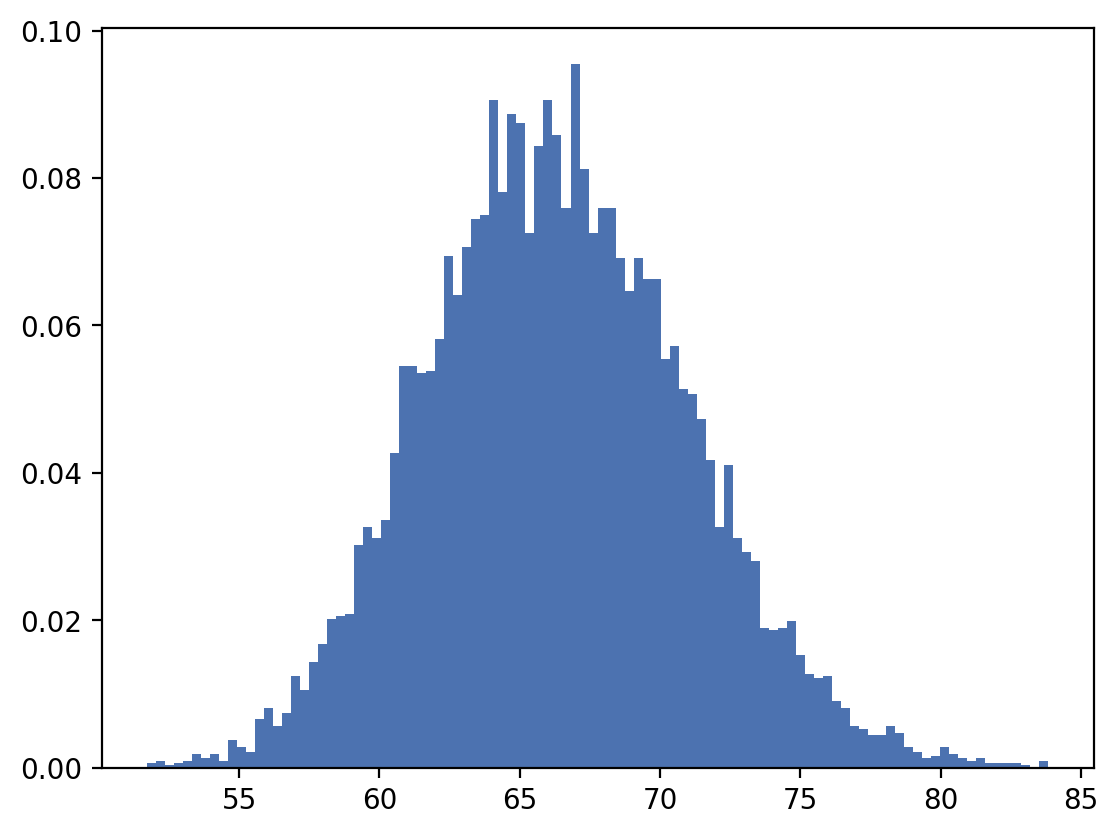

In [11]:
N = 1000
nToy = 10000

integral_value = np.array([integration(mu, sigma, N) for n in tqdm(range(nToy))])

plt.hist(integral_value, bins=100, density=True)
plt.show()

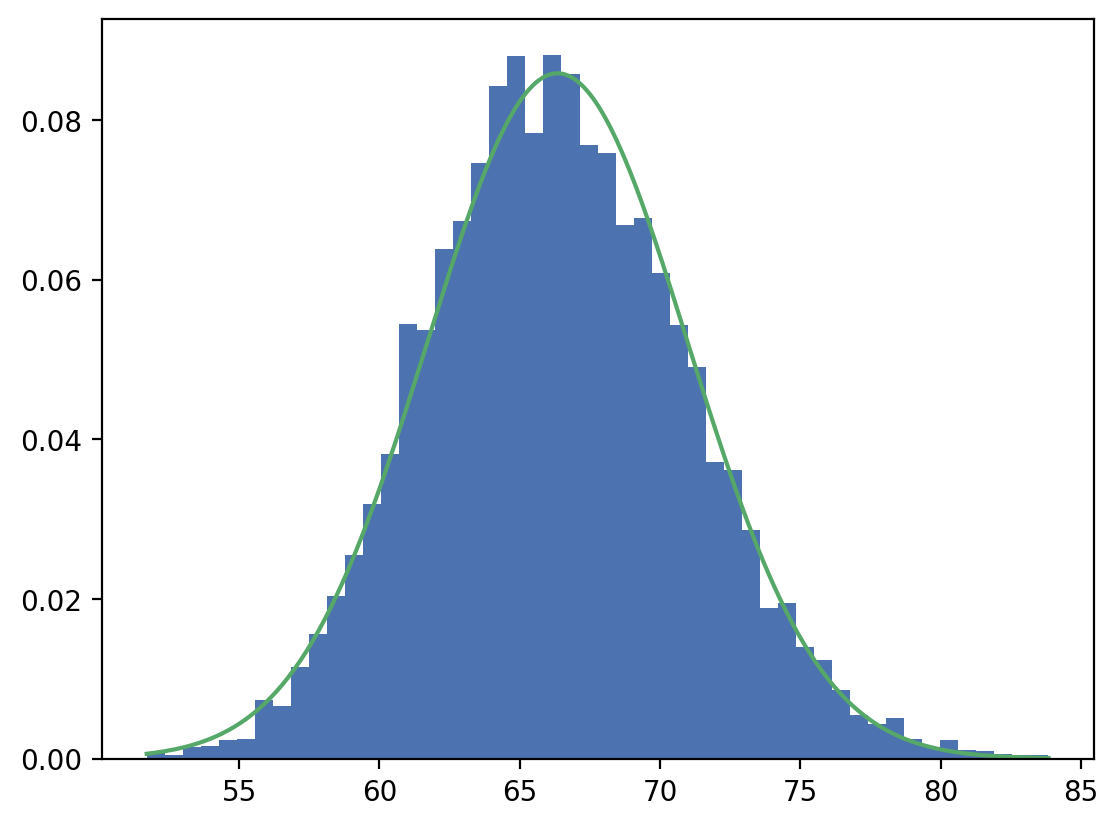

In [12]:
x_grid = np.linspace(np.min(integral_value),np.max(integral_value),300)
plt.hist(integral_value, bins=50, density=True)

mu_int = np.mean(integral_value)
sigma_int = np.std(integral_value)
plt.plot(x_grid, scipy.stats.norm(mu_int,sigma_int).pdf(x_grid))
plt.show()

Increasing N, the distribution tends to be better approximated by a Gaussian. For lower values of N, the distribution is skewed, due to the higher variance and the asymmetry caused by fewer samples.